In [19]:
# Cell to hide - just an option and import other functions

import pandas as pd
pd.set_option('display.max_columns', 27)

%run 1-functions.ipynb

__TODO: the whole thing__

## Predict the mean speed of all ships

Your customer would like to have a model that can predict the mean speed of a vessel based on its type and size. As we will see together, this task is not the easiest with the dataset we have, as it contains a lot of different ships with different goals at sea.

In [69]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

### Prediction using the whole dataset

We will start by predicting simply the ``MeanSOG`` using the ``VesselType``, ``Length``, ``Width`` and ``Draft``. Let's add the attribute names into the variables ``x`` and ``y``.

In [70]:
x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['MeanSOG']

Now we can simply use the function ``knn_regression()`` to make predictions.

In [73]:
predictions, y_test = knn_regression(static_data, x, y)
print('MAE: ' + str(mean_absolute_error(predictions, y_test)))

MAE: 1.2733923934326852


To better undestand if the MAE is good, we need to know the distribution, the max and min values of the attribute we are trying to predict:

In [72]:
static_data['MeanSOG'].describe()

count    1520.000000
mean        1.034825
std         2.936439
min        -0.100000
25%         0.000000
50%         0.012633
75%         0.072000
max        20.360811
Name: MeanSOG, dtype: float64

The mean value of ``MeanSOG`` is ``1.03`` knots, so we can imagine that our MAE of ``1.27`` is not a very good performance. To try to understand why we get this performance, let's visually analyze the distribution of the attribute and the predictions made by the model.

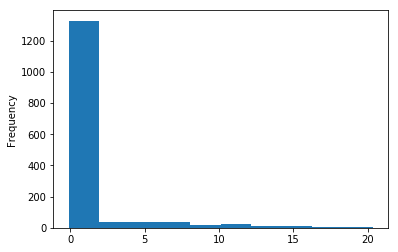

In [74]:
static_data['MeanSOG'].plot.hist()

First, we see that the dataset contains a lot of low values for the attribute ``MeanSOG``. Let's look at the predictions made:

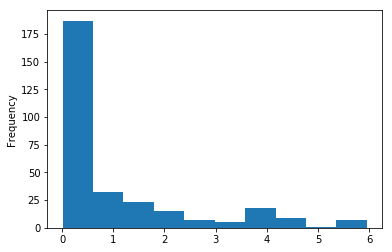

In [75]:
# We need to rearrange the list predictions to be able to use the function hist()
pred = []
for element in predictions:
    pred.append(element[0])
    
pd.Series(pred).plot.hist()

Let's compare this histogram with the one of the real values:

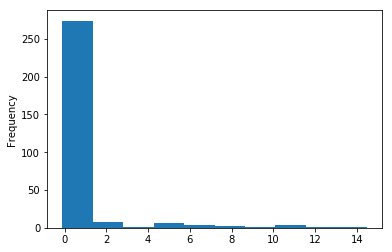

In [84]:
pd.Series(y_test['MeanSOG']).plot.hist()

We see that the model gives much more predictions of low value, but there is still a big difference between predictions and true labels.

How could we try to build a model that gives good predictions for the mean speed of ships with such an unbalanced dataset?

One solution could be to split the dataset between low speed ships and "normal" speed ships. When the customer wants to make a prediction, they should be able to tell if the ship they want to predict the speed is mobile or not, and then be able to select the right model: for mobile or immobile ships. Let's have a look at this idea.

Text(0.5, 1.0, 'Prediction vs. true label')

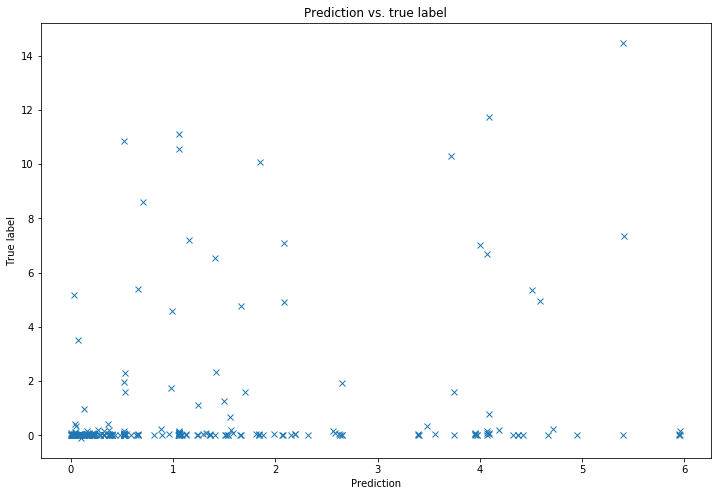

In [86]:
plt.figure(figsize = (12, 8))
plt.plot(pred, y_test, 'x')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Prediction vs. true label')

### Split the dataset

According to the distribution of the data we saw before, we can tell that most low values are under 1. So, let's split the dataset into mobile and immobile ships, taking the value 1 of mean speed for the threshold. For the selection of the data, we use the function [loc()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

In [87]:
immobile = static_data.loc[static_data['MeanSOG'] < 1]
mobile = static_data.loc[static_data['MeanSOG'] >= 1]

Now let's try to make predictions for both datasets and analyze the performances.

In [88]:
# Prediction for immobile ships

predictions1, y_test1 = knn_regression(immobile, x, y)
print('MAE: ' + str(mean_absolute_error(predictions1, y_test1)))

MAE: 0.04326256486970714


In [96]:
immobile['MeanSOG'].mean()

0.04025081017295976

In [91]:
# Prediction for mobile ships

predictions2, y_test2 = knn_regression(mobile, x, y)
print('MAE: ' + str(mean_absolute_error(predictions2, y_test2)))

MAE: 2.8503720152323386


In [97]:
mobile['MeanSOG'].mean()

7.006852415734686

Without looking at the histograms, we can already get an idea of the performance of the models. The model for immobile ships doesn't seem to work very well compared to the mean value of the data, but that might be due to the low range of values.
However, the model for mobile ships seems to be giving better results compared to the mean value of the dataset. Of course, the MAE in general is much higher than the one of the model with the whole dataset, but we saw that the model was only good for predicting the low values of MeanSOG. In fact, we can even check this out simply:

In [100]:
pred = []
for element in predictions:
    pred.append(element[0])
    
#pd.Series(pred).plot.hist()

#pd.Series(y_test['MeanSOG']).plot.hist()

pred_sup1 = []
y_test_sup1 = []

i = 0
for value in y_test['MeanSOG']:
    if value >= 1:
        y_test_sup1.append(value)
        pred_sup1.append(pred[i])
    i = i + 1
    
print(mean_absolute_error(pred_sup1, y_test_sup1))

3.950739471015331


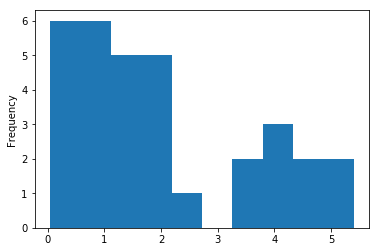

In [101]:
pd.Series(pred_sup1).plot.hist()

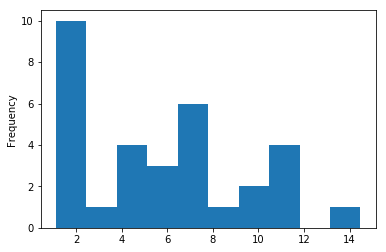

In [102]:
pd.Series(y_test_sup1).plot.hist()

## 1
Exercise of prediction using immobile / mobile trips

1.2733923934326852


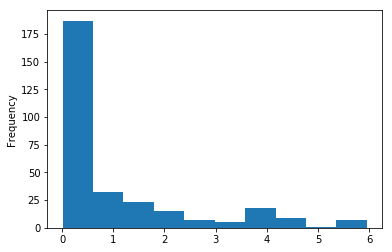

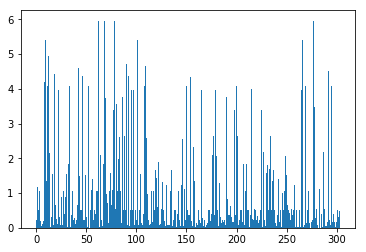

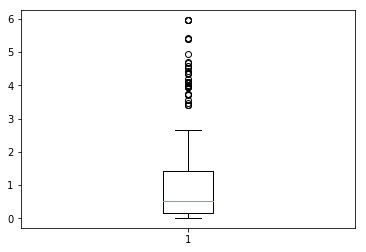

In [20]:
# Predict MeanSOG from all the data (including a lot of immobile ships)

from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['MeanSOG']

predictions, y_test = knn_regression(static_data, x, y)

pred = []
for element in predictions:
    pred.append(element[0])

print(mean_absolute_error(predictions, y_test))

pd.Series(pred).plot.hist()
plt.show()

plt.bar(np.arange(len(pred)), pred)
plt.show()

plt.boxplot(predictions)
plt.show()

2.8503720152323386


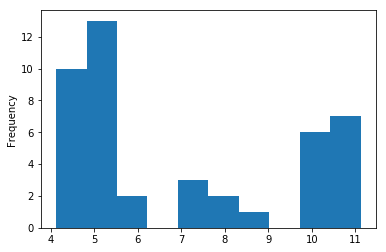

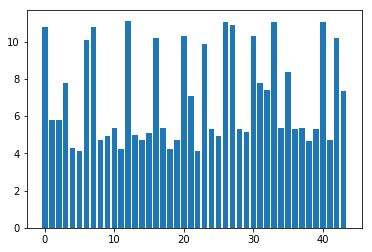

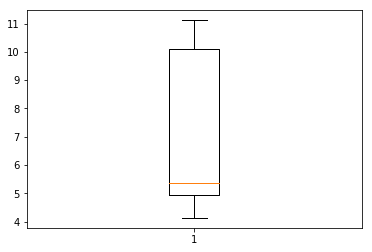

In [4]:
# Predict MeanSOG from only ships with MeanSOG > 1

from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['MeanSOG']

df = static_data.loc[static_data['MeanSOG'] >= 1]

predictions, y_test = knn_regression(df, x, y)

pred = []
for element in predictions:
    pred.append(element[0])

print(mean_absolute_error(predictions, y_test))

pd.Series(pred).plot.hist()
plt.show()

plt.bar(np.arange(len(pred)), pred)
plt.show()

plt.boxplot(predictions)
plt.show()

0.04326256486970714


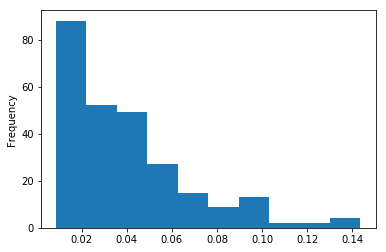

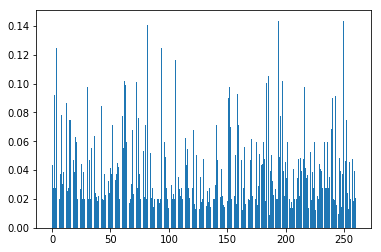

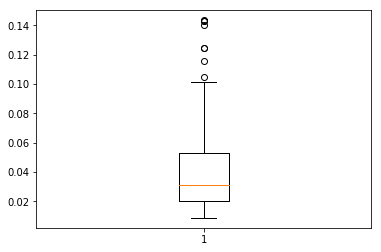

In [5]:
# Predict MeanSOG from only ships with MeanSOG < 1

from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['MeanSOG']

df = static_data.loc[static_data['MeanSOG'] < 1]

predictions, y_test = knn_regression(df, x, y)

pred = []
for element in predictions:
    pred.append(element[0])

print(mean_absolute_error(predictions, y_test))

pd.Series(pred).plot.hist()
plt.show()

plt.bar(np.arange(len(pred)), pred)
plt.show()

plt.boxplot(predictions)
plt.show()

In [22]:
# Add a column "mobile"

static_data['mobile'] = 0

static_data.loc[static_data['MeanSOG'] >= 1, 'mobile'] = 1

In [24]:
static_data.describe()

,TripID,MMSI,MeanSOG,VesselType,Length,Width,Draft,Cargo,DepLat,DepLon,ArrLat,ArrLon,mobile
count,1520.000000,1.520000e+03,1520.000000,1287.000000,1220.000000,911.000000,496.000000,378.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,760.500000,3.597421e+08,1.034825,971.680653,56.769590,13.104501,6.457056,50.515873,46.354331,-122.868905,46.353671,-122.871346,0.142763
std,438.930518,6.263661e+07,2.936439,198.957887,74.739358,10.903338,4.607529,22.693810,3.766705,0.681947,3.762056,0.680604,0.349946
min,1.000000,3.160089e+06,-0.100000,0.000000,6.710000,0.000000,0.000000,0.000000,32.220640,-125.995610,32.209370,-125.998590,0.000000
25%,380.750000,3.380724e+08,0.000000,1004.000000,14.840000,5.500000,3.000000,31.000000,46.168652,-123.178480,46.168460,-123.168262,0.000000
50%,760.500000,3.669802e+08,0.012633,1019.000000,22.340000,8.000000,4.650000,52.000000,47.647795,-122.651365,47.646925,-122.645290,0.000000
75%,1140.250000,3.675663e+08,0.072000,1019.000000,41.277500,16.350000,10.025000,70.000000,48.656940,-122.386562,48.665710,-122.386607,0.000000
max,1520.000000,9.876543e+08,20.360811,1025.000000,349.000000,50.000000,18.800000,99.000000,49.890740,-120.002920,49.832120,-120.002420,1.000000


In [26]:
from sklearn.metrics import mean_absolute_error

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['mobile']

predictions, y_test = knn_regression(static_data, x, y)

print(mean_absolute_error(predictions, y_test))

0.19013157894736843


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['mobile']

df = static_data

x_train, x_test, y_train, y_test = train_test_split(df[x], df[y], test_size = 0.2, random_state = 0)
    
x_train = x_train.fillna(value = 0)
x_test = x_test.fillna(value = 0)
y_train = y_train.fillna(value = 0)
y_test = y_test.fillna(value = 0)
    
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

print(mean_absolute_error(predictions, y_test))

0.15592105263157896


In [39]:
pred = []
for p in predictions:
    pred.append(round(p[0]))
    
print(mean_absolute_error(pred, y_test))

0.12828947368421054


In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[257,  15],
       [ 24,   8]], dtype=int64)

In [45]:
static_data.loc[static_data['mobile'] == 1].count()

TripID        217
MMSI          217
MeanSOG       217
VesselName    210
IMO           141
CallSign      182
VesselType    195
Length        194
Width         181
Draft         133
Cargo          78
DepTime       217
ArrTime       217
DepLat        217
DepLon        217
ArrLat        217
ArrLon        217
DepCountry    217
DepCity       217
ArrCountry    217
ArrCity       217
Duration      217
mobile        217
dtype: int64

In [62]:
df = static_data.loc[static_data['mobile'] == 1]

In [63]:
df = df.append(static_data.loc[static_data['mobile'] == 0].sample(n = 217))

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['mobile']

x_train, x_test, y_train, y_test = train_test_split(df[x], df[y], test_size = 0.2, random_state = 0)
    
x_train = x_train.fillna(value = 0)
x_test = x_test.fillna(value = 0)
y_train = y_train.fillna(value = 0)
y_test = y_test.fillna(value = 0)
    
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

print('MAE: ' + str(mean_absolute_error(predictions, y_test)))

pred = []
for p in predictions:
    pred.append(round(p[0]))
    
print('accuracy: ' + str(accuracy_score(pred, y_test)))

confusion_matrix(y_test, pred)

MAE: 0.31264367816091954
accuracy: 0.7241379310344828


array([[31,  8],
       [16, 32]], dtype=int64)

## 2
Exercise of prediction with a lot of identical data vs. normal dataset (error in copy)

In [6]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

We choose a row without a lot of missing values.

In [7]:
static_data.head()

,TripID,MMSI,MeanSOG,VesselName,IMO,CallSign,VesselType,Length,Width,Draft,Cargo,DepTime,ArrTime,DepLat,DepLon,ArrLat,ArrLon,DepCountry,DepCity,ArrCountry,ArrCity,Duration
0,1,367114690,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:06,2017-01-01 02:40:45,48.51094,-122.60705,48.51095,-122.60705,US,Anacortes,US,Anacortes,0 days 02:40:39
1,2,367479990,6.536585,WSF KENNEWICK,IMO9618331,WDF6991,1012.0,83.39,19.5,3.2,NaN,2017-01-01 00:00:03,2017-01-01 02:40:44,48.15891,-122.67268,48.11099,-122.75885,US,Coupeville,US,Port Townsend,0 days 02:40:41
2,3,368319000,0.000758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:08,2017-01-01 02:44:48,43.34576,-124.32142,43.34578,-124.32141,US,Barview,US,Barview,0 days 02:44:40
3,4,367154100,6.871111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:15,2017-01-01 02:33:28,46.74264,-124.93125,47.02928,-124.95153,US,Ocean Shores,US,Ocean Shores,0 days 02:33:13
4,5,367446870,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:59,2017-01-01 02:42:54,48.51320,-122.60718,48.51318,-122.60699,US,Anacortes,US,Anacortes,0 days 02:41:55


We create a few different datasets by copying this row 10 times, 100 times, 1000 times, 10000 times.

In [8]:
%%time
line = static_data.loc[1]
df10 = static_data.append(line)
df10.name = 'df10'
for i in range(9):
    df10 = df10.append(line)

Wall time: 66 ms


In [9]:
%%time
line = static_data.loc[1]
df100 = df10.append(line)
df100.name = 'df100'
for i in range(89):
    df100 = df100.append(line)

Wall time: 468 ms


In [10]:
%%time
line = static_data.loc[1]
df1000 = df100.append(line)
df1000.name = 'df1000'
for i in range(889):
    df1000 = df1000.append(line)

Wall time: 4.7 s


In [11]:
%%time
line = static_data.loc[1]
df10000 = df1000.append(line)
df10000.name = 'df10000'
for i in range(8889):
    df10000 = df10000.append(line)

Wall time: 56.7 s


In [12]:
static_data.describe()

,TripID,MMSI,MeanSOG,VesselType,Length,Width,Draft,Cargo,DepLat,DepLon,ArrLat,ArrLon
count,1520.000000,1.520000e+03,1520.000000,1287.000000,1220.000000,911.000000,496.000000,378.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,760.500000,3.597421e+08,1.034825,971.680653,56.769590,13.104501,6.457056,50.515873,46.354331,-122.868905,46.353671,-122.871346
std,438.930518,6.263661e+07,2.936439,198.957887,74.739358,10.903338,4.607529,22.693810,3.766705,0.681947,3.762056,0.680604
min,1.000000,3.160089e+06,-0.100000,0.000000,6.710000,0.000000,0.000000,0.000000,32.220640,-125.995610,32.209370,-125.998590
25%,380.750000,3.380724e+08,0.000000,1004.000000,14.840000,5.500000,3.000000,31.000000,46.168652,-123.178480,46.168460,-123.168262
50%,760.500000,3.669802e+08,0.012633,1019.000000,22.340000,8.000000,4.650000,52.000000,47.647795,-122.651365,47.646925,-122.645290
75%,1140.250000,3.675663e+08,0.072000,1019.000000,41.277500,16.350000,10.025000,70.000000,48.656940,-122.386562,48.665710,-122.386607
max,1520.000000,9.876543e+08,20.360811,1025.000000,349.000000,50.000000,18.800000,99.000000,49.890740,-120.002920,49.832120,-120.002420


In [13]:
for df in [df10, df100, df1000, df10000]:
    print(df.describe())

            TripID          MMSI      MeanSOG   VesselType       Length  \
count  1530.000000  1.530000e+03  1530.000000  1297.000000  1230.000000   
mean    755.542484  3.597927e+08     1.070784   971.991519    56.986016   
std     441.744387  6.243456e+07     2.960229   198.220215    74.473078   
min       1.000000  3.160089e+06    -0.100000     0.000000     6.710000   
25%     373.250000  3.380754e+08     0.000000  1004.000000    14.910000   
50%     755.500000  3.669823e+08     0.013043  1019.000000    22.620000   
75%    1137.750000  3.675648e+08     0.075694  1019.000000    43.715000   
max    1520.000000  9.876543e+08    20.360811  1025.000000   349.000000   

            Width       Draft       Cargo       DepLat       DepLon  \
count  921.000000  506.000000  378.000000  1530.000000  1530.000000   
mean    13.173941    6.392688   50.515873    46.366126  -122.867623   
std     10.864177    4.584196   22.693810     3.757184     0.679897   
min      0.000000    0.000000    0.00000

df: MAE = 1.2733923934326852
df10: MAE = 1.157407804442135
df100: MAE = 1.23786706177166
df1000: MAE = 0.9026804630340876
df10000: MAE = 0.20197894745555736


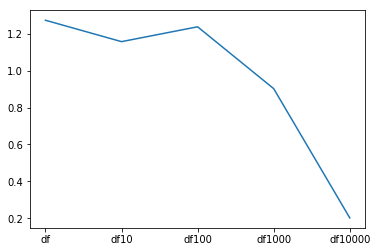

In [14]:
# Comparison of prediction of MeanSOG with normal static data and copied datasets

from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

x = ['VesselType', 'Length', 'Width', 'Draft']
y = ['MeanSOG']

errors = [[], []]

static_data.name = 'df'
df10.name = 'df10'
df100.name = 'df100'
df1000.name = 'df1000'
df10000.name = 'df10000'

for df in [static_data, df10, df100, df1000, df10000]:
    predictions, y_test = knn_regression(df, x, y)
    error = mean_absolute_error(predictions, y_test)
    print(df.name + ': MAE = ' + str(error))
    
    errors[0].append(df.name)
    errors[1].append(error)
    
plt.plot(errors[0], errors[1])

## 3
More ideas
+ Try to predict with something that does not make sense (example: using ID attribute as a number)
+ or using Length as a category
+ mixing regression and classification

In [15]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

In [16]:
# Prediction of Width from Length or TripID

from sklearn.metrics import mean_absolute_error

x = ['Length']
y = ['Width']
pred, ytest = knn_regression(static_data, x, y)
print('MAE with Length: ' + str(mean_absolute_error(pred, ytest)))

x = ['Length', 'TripID']
y = ['Width']
pred, ytest = knn_regression(static_data, x, y)
print('MAE with Length and TripID: ' + str(mean_absolute_error(pred, ytest)))

x = ['TripID']
y = ['Width']
pred, ytest = knn_regression(static_data, x, y)
print('MAE with TripID: ' + str(mean_absolute_error(pred, ytest)))

print('Baseline: mean = ' + str(static_data['Width'].mean()))

MAE with Length: 2.73451052631579
MAE with Length and TripID: 3.8834960526315796
MAE with TripID: 7.796980263157895
Baseline: mean = 13.10450054884743


In [17]:
# Prediction of Width from Length: comparison regression and classification

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

x = ['Length']
y = ['Width']

df = static_data.copy()
df = df.dropna()

pred, ytest = knn_regression(df, x, y)

print('MAE with regression: ' + str(mean_absolute_error(pred, ytest)))

df2 = static_data.copy()
df2 = df2.dropna()
df2['Width'] = df2['Width'].astype('int')
df2['Width'] = df2['Width'].astype('category')

pred, ytest = knn_classification(df2, x, y)

print('Accuracy with classification: ' + str(accuracy_score(pred, ytest)))

MAE with regression: 2.0717238095238097
Accuracy with classification: 0.38095238095238093


C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
